In [1]:
from ultralytics import YOLO
import cv2
import os
import sys
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt

sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [2]:
labels = pd.read_csv('./labels_my-project-name_2024-05-12-05-03-51.csv')
labels.head()

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,Bad,155,93,50,57,Jasmine (1).jpg,250,250
1,Bad,156,106,49,64,Jasmine (10).jpg,250,250
2,Moderate,130,124,60,63,Jasmine (100).jpg,250,250
3,Moderate,112,49,61,59,Jasmine (101).jpg,250,250
4,Moderate,74,151,51,56,Jasmine (102).jpg,250,250


## EDIT "path" to match your jasmine rice source

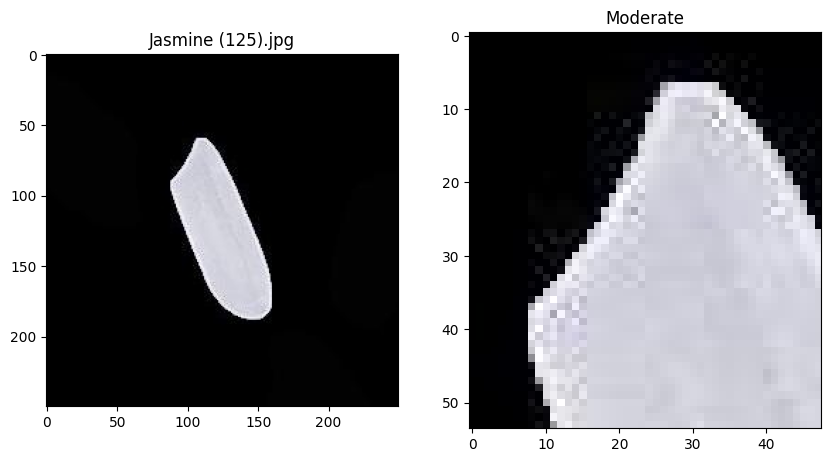

In [3]:
N = labels.shape[0]
rr = np.random.randint(0, N)

# EDIT HERE 
path = '../rice-image-dataset-for-object-segmentation/Rice_Image_Dataset_Seg/Jasmine/' + labels.iloc[rr]['image_name']

img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.title(labels.iloc[rr]['image_name'])
plt.imshow(img)

x, y, w, h = labels.iloc[rr][['bbox_x', 'bbox_y', 'bbox_width', 'bbox_height']]
qc = labels.iloc[rr]['label_name']
crop_img = img[y:y+h, x:x+w]
plt.subplot(1, 2, 2)
plt.title(qc)
plt.imshow(crop_img)
plt.show()

In [4]:
print("Good: ", labels[labels['label_name'] == 'Good'].shape[0])
print("Moderate: ", labels[labels['label_name'] == 'Moderate'].shape[0])
print("Bad: ", labels[labels['label_name'] == 'Bad'].shape[0])

print("width min max mean:", labels['bbox_width'].min(), labels['bbox_width'].max(), labels['bbox_width'].mean())
print("height min max mean:", labels['bbox_height'].min(), labels['bbox_height'].max(), labels['bbox_height'].mean())

Good:  150
Moderate:  150
Bad:  150
width min max mean: 32 69 49.30222222222222
height min max mean: 32 67 49.888888888888886


In [5]:
for i in range(N):
    img = cv2.imread('../rice-image-dataset-for-object-segmentation/Rice_Image_Dataset_Seg/Jasmine/' + labels.iloc[i]['image_name'])
    x, y, w, h = labels.iloc[i][['bbox_x', 'bbox_y', 'bbox_width', 'bbox_height']]
    qc = labels.iloc[i]['label_name']
    crop_img = img[y:y+h, x:x+w]
    name = labels.iloc[i]['image_name']
    thr = 0.8
    rr = np.random.rand()
    if rr < thr:
        if not os.path.exists(f'./dataset/train/{qc}'):
            os.makedirs(f'./dataset/train/{qc}')
        path = f'./dataset/train/{qc}/{name}'
        cv2.imwrite(path, crop_img)
    else:
        if not os.path.exists(f'./dataset/val/{qc}'):
            os.makedirs(f'./dataset/val/{qc}')
        path2 = f'./dataset/val/{qc}/{name}'
        cv2.imwrite(path2, crop_img)
    

In [6]:
model = YOLO('yolov8x-cls.pt')

# run4-x500-b80-im100
# run-x500-b80-im100-split

config = {
    'data': os.path.abspath('./dataset'),
    'epochs': 500,
    'batch': 80,
    'imgsz': 128,
    'device': '0',
    'workers': 32,
    'cache': True,
}
trained_model = model.train(**config)

New https://pypi.org/project/ultralytics/8.2.14 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.37 🚀 Python-3.11.8 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4080, 16071MiB)
engine/trainer: task=classify, mode=train, model=yolov8x-cls.pt, data=/home/andre/Desktop/ComputerVision_STA_Project/classification/dataset, epochs=500, time=None, patience=100, batch=80, imgsz=128, save=True, save_period=-1, cache=True, device=0, workers=32, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, cla

train: Scanning /home/andre/Desktop/ComputerVision_STA_Project/classification/dataset/train... 375 images, 0 corrupt: 100%|██████████| 375/375 [00:00<00:00, 15490.55it/s]

train: New cache created: /home/andre/Desktop/ComputerVision_STA_Project/classification/dataset/train.cache



val: Scanning /home/andre/Desktop/ComputerVision_STA_Project/classification/dataset/val... 75 images, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 16166.76it/s]

val: New cache created: /home/andre/Desktop/ComputerVision_STA_Project/classification/dataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.000625), 51 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 128 train, 128 val
Using 24 dataloader workers
Logging results to runs/classify/train3
Starting training for 500 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/500      2.72G      1.159         55        128: 100%|██████████| 5/5 [00:00<00:00,  9.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.72it/s]

                   all      0.267          1



      Epoch    GPU_mem       loss  Instances       Size


      2/500       2.9G       1.15         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.47it/s]

                   all      0.293          1



      Epoch    GPU_mem       loss  Instances       Size


      3/500      2.74G      1.103         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.65it/s]

                   all      0.333          1



      Epoch    GPU_mem       loss  Instances       Size


      4/500      2.74G      1.067         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.79it/s]

                   all       0.44          1



      Epoch    GPU_mem       loss  Instances       Size


      5/500      2.75G      1.082         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 81.12it/s]

                   all      0.587          1



      Epoch    GPU_mem       loss  Instances       Size


      6/500      2.88G     0.9954         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.16it/s]

                   all      0.653          1



      Epoch    GPU_mem       loss  Instances       Size


      7/500      2.89G     0.9396         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.72it/s]

                   all      0.653          1



      Epoch    GPU_mem       loss  Instances       Size


      8/500      2.75G     0.8681         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.46it/s]

                   all      0.733          1



      Epoch    GPU_mem       loss  Instances       Size


      9/500      2.75G     0.7932         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.46it/s]

                   all      0.747          1



      Epoch    GPU_mem       loss  Instances       Size


     10/500      2.75G      0.728         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.61it/s]

                   all       0.76          1



      Epoch    GPU_mem       loss  Instances       Size


     11/500      2.75G     0.6568         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 80.93it/s]

                   all        0.8          1



      Epoch    GPU_mem       loss  Instances       Size


     12/500      2.75G     0.6078         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 80.56it/s]

                   all      0.733          1



      Epoch    GPU_mem       loss  Instances       Size


     13/500      2.75G     0.5513         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.76it/s]

                   all       0.72          1



      Epoch    GPU_mem       loss  Instances       Size


     14/500      2.75G     0.5441         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 75.77it/s]

                   all      0.733          1



      Epoch    GPU_mem       loss  Instances       Size


     15/500      2.75G     0.4858         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 80.35it/s]

                   all       0.64          1



      Epoch    GPU_mem       loss  Instances       Size


     16/500      2.75G     0.4802         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.59it/s]

                   all       0.68          1



      Epoch    GPU_mem       loss  Instances       Size


     17/500      2.75G      0.498         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 75.22it/s]

                   all      0.693          1



      Epoch    GPU_mem       loss  Instances       Size


     18/500      2.75G     0.5205         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.15it/s]

                   all       0.72          1



      Epoch    GPU_mem       loss  Instances       Size


     19/500      2.75G     0.4946         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.89it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     20/500      2.75G     0.4411         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.81it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     21/500      2.75G     0.4431         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.13it/s]

                   all      0.693          1



      Epoch    GPU_mem       loss  Instances       Size


     22/500      2.75G      0.423         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.35it/s]

                   all      0.627          1



      Epoch    GPU_mem       loss  Instances       Size


     23/500      2.75G     0.4151         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 80.75it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     24/500      2.75G      0.405         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.78it/s]

                   all       0.68          1



      Epoch    GPU_mem       loss  Instances       Size


     25/500      2.75G     0.4301         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.93it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     26/500      2.75G     0.3891         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 80.51it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     27/500      2.75G     0.3748         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 76.03it/s]

                   all       0.56          1



      Epoch    GPU_mem       loss  Instances       Size


     28/500      2.75G     0.3594         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.10it/s]

                   all      0.587          1



      Epoch    GPU_mem       loss  Instances       Size


     29/500      2.75G     0.3665         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.74it/s]

                   all      0.653          1



      Epoch    GPU_mem       loss  Instances       Size


     30/500      2.75G     0.2438         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.79it/s]

                   all      0.613          1



      Epoch    GPU_mem       loss  Instances       Size


     31/500      2.75G     0.2908         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.66it/s]

                   all      0.613          1



      Epoch    GPU_mem       loss  Instances       Size


     32/500      2.75G     0.3496         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.69it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     33/500      2.75G      0.316         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 84.13it/s]

                   all      0.587          1



      Epoch    GPU_mem       loss  Instances       Size


     34/500      2.75G     0.3195         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 76.97it/s]

                   all      0.653          1



      Epoch    GPU_mem       loss  Instances       Size


     35/500      2.75G     0.2741         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 80.82it/s]

                   all      0.653          1



      Epoch    GPU_mem       loss  Instances       Size


     36/500      2.75G     0.2652         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 46.56it/s]

                   all      0.627          1



      Epoch    GPU_mem       loss  Instances       Size


     37/500      2.75G     0.2458         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.37it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     38/500      2.75G     0.2147         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 80.34it/s]

                   all       0.64          1



      Epoch    GPU_mem       loss  Instances       Size


     39/500      2.75G       0.29         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 75.96it/s]

                   all      0.693          1



      Epoch    GPU_mem       loss  Instances       Size


     40/500      2.75G     0.2332         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 76.73it/s]

                   all      0.653          1



      Epoch    GPU_mem       loss  Instances       Size


     41/500      2.75G     0.2907         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 80.38it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     42/500      2.75G     0.2329         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.19it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     43/500      2.75G     0.3015         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.67it/s]

                   all       0.64          1



      Epoch    GPU_mem       loss  Instances       Size


     44/500      2.75G     0.2218         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.80it/s]

                   all       0.68          1



      Epoch    GPU_mem       loss  Instances       Size


     45/500      2.75G     0.2025         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.44it/s]

                   all      0.693          1



      Epoch    GPU_mem       loss  Instances       Size


     46/500      2.75G     0.1968         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 81.13it/s]

                   all       0.72          1



      Epoch    GPU_mem       loss  Instances       Size


     47/500      2.75G     0.2536         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.14it/s]

                   all      0.627          1



      Epoch    GPU_mem       loss  Instances       Size


     48/500      2.75G     0.2234         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 76.94it/s]

                   all       0.64          1



      Epoch    GPU_mem       loss  Instances       Size


     49/500      2.75G     0.1515         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 76.23it/s]

                   all        0.6          1



      Epoch    GPU_mem       loss  Instances       Size


     50/500      2.75G      0.219         55        128: 100%|██████████| 5/5 [00:00<00:00, 15.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.04it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     51/500      2.75G     0.1532         55        128: 100%|██████████| 5/5 [00:00<00:00, 15.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 75.79it/s]

                   all       0.64          1



      Epoch    GPU_mem       loss  Instances       Size


     52/500      2.75G     0.2059         55        128: 100%|██████████| 5/5 [00:00<00:00, 15.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 80.61it/s]

                   all      0.693          1



      Epoch    GPU_mem       loss  Instances       Size


     53/500      2.75G     0.1677         55        128: 100%|██████████| 5/5 [00:00<00:00, 15.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.67it/s]

                   all      0.627          1



      Epoch    GPU_mem       loss  Instances       Size


     54/500      2.75G     0.1971         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.54it/s]

                   all      0.627          1



      Epoch    GPU_mem       loss  Instances       Size


     55/500      2.75G     0.1618         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 81.92it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     56/500      2.75G     0.2202         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.14it/s]

                   all      0.653          1



      Epoch    GPU_mem       loss  Instances       Size


     57/500      2.75G     0.1582         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.54it/s]

                   all       0.64          1



      Epoch    GPU_mem       loss  Instances       Size


     58/500      2.75G     0.1644         55        128: 100%|██████████| 5/5 [00:00<00:00, 15.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 76.52it/s]

                   all      0.693          1



      Epoch    GPU_mem       loss  Instances       Size


     59/500      2.75G     0.2299         55        128: 100%|██████████| 5/5 [00:00<00:00, 15.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.79it/s]

                   all       0.72          1



      Epoch    GPU_mem       loss  Instances       Size


     60/500      2.75G     0.1869         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.43it/s]

                   all      0.707          1



      Epoch    GPU_mem       loss  Instances       Size


     61/500      2.75G     0.1977         55        128: 100%|██████████| 5/5 [00:00<00:00, 16.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 80.89it/s]

                   all      0.747          1



      Epoch    GPU_mem       loss  Instances       Size


     62/500      2.75G     0.1968         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 75.33it/s]

                   all      0.693          1



      Epoch    GPU_mem       loss  Instances       Size


     63/500      2.75G     0.1489         55        128: 100%|██████████| 5/5 [00:00<00:00, 15.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.36it/s]

                   all       0.68          1



      Epoch    GPU_mem       loss  Instances       Size


     64/500      2.75G     0.2285         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.44it/s]

                   all      0.613          1



      Epoch    GPU_mem       loss  Instances       Size


     65/500      2.75G     0.1463         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 80.80it/s]

                   all       0.56          1



      Epoch    GPU_mem       loss  Instances       Size


     66/500      2.75G     0.1739         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 81.66it/s]

                   all      0.533          1



      Epoch    GPU_mem       loss  Instances       Size


     67/500      2.75G     0.1364         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.69it/s]

                   all      0.587          1



      Epoch    GPU_mem       loss  Instances       Size


     68/500      2.75G      0.135         55        128: 100%|██████████| 5/5 [00:00<00:00, 16.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.31it/s]

                   all      0.693          1



      Epoch    GPU_mem       loss  Instances       Size


     69/500      2.75G     0.1485         55        128: 100%|██████████| 5/5 [00:00<00:00, 15.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.86it/s]

                   all      0.653          1



      Epoch    GPU_mem       loss  Instances       Size


     70/500      2.75G     0.1956         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 80.66it/s]

                   all       0.64          1



      Epoch    GPU_mem       loss  Instances       Size


     71/500      2.75G     0.1837         55        128: 100%|██████████| 5/5 [00:00<00:00, 15.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.82it/s]

                   all       0.68          1



      Epoch    GPU_mem       loss  Instances       Size


     72/500      2.75G     0.1531         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 80.50it/s]

                   all       0.68          1



      Epoch    GPU_mem       loss  Instances       Size


     73/500      2.75G    0.09575         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.14it/s]

                   all      0.693          1



      Epoch    GPU_mem       loss  Instances       Size


     74/500      2.75G     0.1683         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.02it/s]

                   all      0.627          1



      Epoch    GPU_mem       loss  Instances       Size


     75/500      2.75G     0.1368         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 76.97it/s]

                   all      0.627          1



      Epoch    GPU_mem       loss  Instances       Size


     76/500      2.75G     0.1373         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 76.11it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     77/500      2.75G     0.1914         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.22it/s]

                   all      0.627          1



      Epoch    GPU_mem       loss  Instances       Size


     78/500      2.75G     0.1797         55        128: 100%|██████████| 5/5 [00:00<00:00, 16.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.73it/s]

                   all        0.6          1



      Epoch    GPU_mem       loss  Instances       Size


     79/500      2.75G     0.1564         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.56it/s]

                   all      0.573          1



      Epoch    GPU_mem       loss  Instances       Size


     80/500      2.75G     0.1808         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.97it/s]

                   all      0.627          1



      Epoch    GPU_mem       loss  Instances       Size


     81/500      2.75G    0.09089         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.81it/s]

                   all      0.693          1



      Epoch    GPU_mem       loss  Instances       Size


     82/500      2.75G     0.1079         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.01it/s]

                   all       0.68          1



      Epoch    GPU_mem       loss  Instances       Size


     83/500      2.75G     0.1339         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 76.09it/s]

                   all      0.627          1



      Epoch    GPU_mem       loss  Instances       Size


     84/500      2.75G     0.1177         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.47it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     85/500      2.75G    0.09423         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.54it/s]

                   all      0.693          1



      Epoch    GPU_mem       loss  Instances       Size


     86/500      2.75G     0.1444         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 76.86it/s]

                   all      0.707          1



      Epoch    GPU_mem       loss  Instances       Size


     87/500      2.75G     0.1383         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 80.82it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     88/500      2.75G     0.1652         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 81.48it/s]

                   all      0.653          1



      Epoch    GPU_mem       loss  Instances       Size


     89/500      2.75G     0.1148         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 80.59it/s]

                   all       0.56          1



      Epoch    GPU_mem       loss  Instances       Size


     90/500      2.75G     0.1337         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.58it/s]

                   all      0.547          1



      Epoch    GPU_mem       loss  Instances       Size


     91/500      2.75G     0.1433         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 76.33it/s]

                   all       0.56          1



      Epoch    GPU_mem       loss  Instances       Size


     92/500      2.75G     0.1377         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.10it/s]

                   all      0.613          1



      Epoch    GPU_mem       loss  Instances       Size


     93/500      2.75G     0.1422         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.20it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


     94/500      2.75G     0.1134         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.63it/s]

                   all       0.56          1



      Epoch    GPU_mem       loss  Instances       Size


     95/500      2.75G     0.1109         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.80it/s]

                   all      0.533          1



      Epoch    GPU_mem       loss  Instances       Size


     96/500      2.75G     0.1139         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.93it/s]

                   all      0.493          1



      Epoch    GPU_mem       loss  Instances       Size


     97/500      2.75G     0.1907         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 80.73it/s]

                   all        0.6          1



      Epoch    GPU_mem       loss  Instances       Size


     98/500      2.75G     0.1387         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.43it/s]

                   all       0.72          1



      Epoch    GPU_mem       loss  Instances       Size


     99/500      2.75G     0.1395         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.05it/s]

                   all      0.707          1



      Epoch    GPU_mem       loss  Instances       Size


    100/500      2.75G     0.1364         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.28it/s]

                   all      0.693          1



      Epoch    GPU_mem       loss  Instances       Size


    101/500      2.75G    0.09228         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.79it/s]

                   all      0.627          1



      Epoch    GPU_mem       loss  Instances       Size


    102/500      2.75G     0.1559         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.52it/s]

                   all      0.627          1



      Epoch    GPU_mem       loss  Instances       Size


    103/500      2.75G     0.1262         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.75it/s]

                   all       0.64          1



      Epoch    GPU_mem       loss  Instances       Size


    104/500      2.75G     0.1231         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.54it/s]

                   all      0.653          1



      Epoch    GPU_mem       loss  Instances       Size


    105/500      2.75G    0.08923         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 77.43it/s]

                   all      0.653          1



      Epoch    GPU_mem       loss  Instances       Size


    106/500      2.75G     0.1323         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.05it/s]

                   all      0.707          1



      Epoch    GPU_mem       loss  Instances       Size


    107/500      2.75G     0.1304         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 75.31it/s]

                   all      0.693          1



      Epoch    GPU_mem       loss  Instances       Size


    108/500      2.75G     0.1142         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.16it/s]

                   all      0.747          1



      Epoch    GPU_mem       loss  Instances       Size


    109/500      2.75G     0.1227         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 79.13it/s]

                   all       0.68          1



      Epoch    GPU_mem       loss  Instances       Size


    110/500      2.75G     0.1153         55        128: 100%|██████████| 5/5 [00:00<00:00, 18.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 80.42it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


    111/500      2.75G     0.1209         55        128: 100%|██████████| 5/5 [00:00<00:00, 17.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 78.31it/s]

                   all      0.707          1
Stopping training early as no improvement observed in last 100 epochs. Best results observed at epoch 11, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



111 epochs completed in 0.035 hours.
Optimizer stripped from runs/classify/train3/weights/last.pt, 112.5MB
Optimizer stripped from runs/classify/train3/weights/best.pt, 112.5MB

Validating runs/classify/train3/weights/best.pt...
Ultralytics YOLOv8.1.37 🚀 Python-3.11.8 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4080, 16071MiB)
YOLOv8x-cls summary (fused): 133 layers, 56127043 parameters, 0 gradients, 153.8 GFLOPs
train: /home/andre/Desktop/ComputerVision_STA_Project/classification/dataset/train... found 375 images in 3 classes ✅ 
val: /home/andre/Desktop/ComputerVision_STA_Project/classification/dataset/val... found 75 images in 3 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 72.31it/s]


                   all        0.8          1
Speed: 0.0ms preprocess, 0.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train3
Results saved to runs/classify/train3


In [9]:
best_model_num = 4

myModel = YOLO(f'./runs/classify/train{best_model_num}/weights/best.pt')
results = myModel.predict('./dataset/train/Bad/Jasmine (15).jpg')
# print(results[0].probs.top1)
print(results[0].names[results[0].probs.top1])
# results[0].show()

# validate confusion matrix
results = myModel.val()


image 1/1 /home/andre/Desktop/ComputerVision_STA_Project/classification/dataset/train/Bad/Jasmine (15).jpg: 128x128 Bad 1.00, Moderate 0.00, Good 0.00, 1.9ms
Speed: 0.8ms preprocess, 1.9ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)
Bad
Ultralytics YOLOv8.1.37 🚀 Python-3.11.8 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4080, 16071MiB)
train: /home/andre/Desktop/ComputerVision_STA_Project/classification/dataset/train... found 375 images in 3 classes ✅ 
val: /home/andre/Desktop/ComputerVision_STA_Project/classification/dataset/val... found 75 images in 3 classes ✅ 
test: None...


val: Scanning /home/andre/Desktop/ComputerVision_STA_Project/classification/dataset/val... 75 images, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 35.77it/s]


                   all          1          1
Speed: 0.0ms preprocess, 1.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


In [32]:
myModel.export(format='onnx')

Ultralytics YOLOv8.1.37 🚀 Python-3.11.8 torch-2.1.0+cu121 CPU (13th Gen Intel Core(TM) i7-13700K)

PyTorch: starting from 'runs/classify/train4/weights/best.pt' with input shape (1, 3, 128, 128) BCHW and output shape(s) (1, 3) (107.3 MB)

ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 0.9s, saved as 'runs/classify/train4/weights/best.onnx' (214.1 MB)

Export complete (2.0s)
Results saved to /home/andre/Desktop/ComputerVision_STA_Project/classification/runs/classify/train4/weights
Predict:         yolo predict task=classify model=runs/classify/train4/weights/best.onnx imgsz=128  
Validate:        yolo val task=classify model=runs/classify/train4/weights/best.onnx imgsz=128 data=/home/andre/Desktop/ComputerVision_STA_Project/classification/dataset  
Visualize:       https://netron.app


'runs/classify/train4/weights/best.onnx'